## Simulation for short-term forward rates

## Q1(a)-- Vasicek Model 

  Empirical mean at large t: 0.04147, Expected mean: 0.04
  Empirical variance at large t: 0.06467, Expected variance: 0.06400



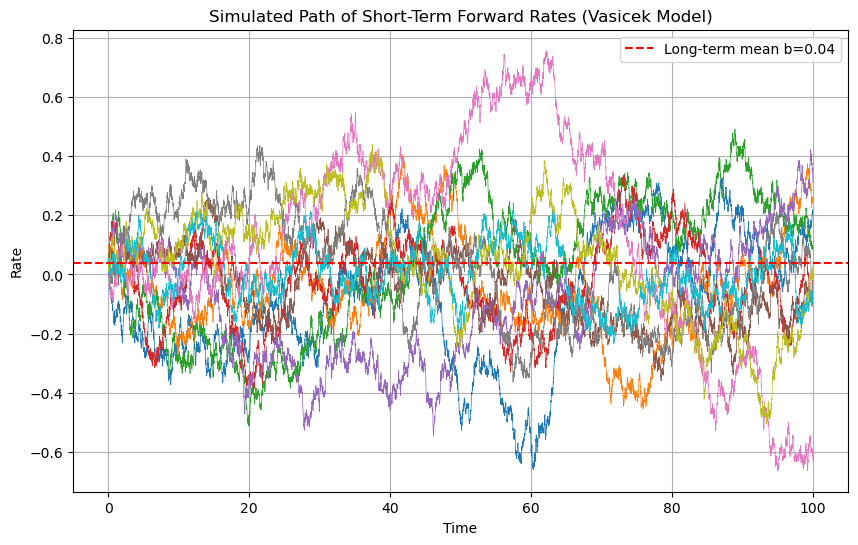

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Vasicek model simulation function
def vasicek_simulation_multi(r0, b, a, sigma, T, N, num_paths):
    dt = T / N  # time step size
    t = np.linspace(0, T, N)  # time grid
    r_paths = np.zeros((num_paths, N))  # Store multiple paths
    r_paths[:, 0] = r0  # Initial rate for all paths

    # Generate noise for all paths and all time steps at once
    for i in range(1, N):
        epsilon = np.random.normal(0,np.sqrt(dt), num_paths)  # Generate N(0, 1) for each path
        r_paths[:, i] = r_paths[:, i - 1] + a * (b - r_paths[:, i - 1]) * dt + sigma * epsilon

    return t, r_paths

# Parameters
r0 = 0.05  # Initial rate
T = 100
N = 9000  # Number of time steps
num_paths = 3000  # Increased number of paths

# Plotting the results for different parameter sets
def plot_vasicek_results(r0,T,N,num_paths,param_set):
    #for i, param_set in enumerate(params):
    t, r_paths = vasicek_simulation_multi(r0, param_set["b"], param_set["a"], param_set["sigma"], T, N, num_paths)
    
    # Theoretical variance for the Vasicek model
    theoretical_variance = (param_set["sigma"] ** 2) / (2 * param_set["a"])
    
    # Select the last time step (large t) for all trajectories
    r_at_large_t = r_paths[:, -1]  # All paths at time t = T
    
    # Calculate empirical mean and variance across all trajectories at large t
    empirical_mean = np.mean(r_at_large_t)
    empirical_variance = np.var(r_at_large_t)        
    b = param_set["b"]
    
    # Print empirical results
    #print(f"Case {i+1}:")
    print(f"  Empirical mean at large t: {empirical_mean:.5f}, Expected mean: {b}")        
    print(f"  Empirical variance at large t: {empirical_variance:.5f}, Expected variance: {theoretical_variance:.5f}")
    print()
        
    # Plot a subset of trajectories for visualization
    plt.figure(figsize=(10, 6))
    for j in range(min(10, num_paths)):  # Plot first 10 trajectories
        plt.plot(t, r_paths[j, :], lw=0.5)
    
    # Draw long-term mean line only once after plotting all paths
    plt.axhline(y=b, color='r', linestyle='--', label=f'Long-term mean b={b}')
    plt.title(f'Simulated Path of Short-Term Forward Rates (Vasicek Model)')        
    plt.xlabel('Time')
    plt.ylabel('Rate')        
    plt.legend()
    plt.grid(True)        
    plt.show()
# Different parameter sets
params = {"b": 0.04, "a": 0.05, "sigma": 0.08} # Base case
plot_vasicek_results(r0, T, N, num_paths, params)

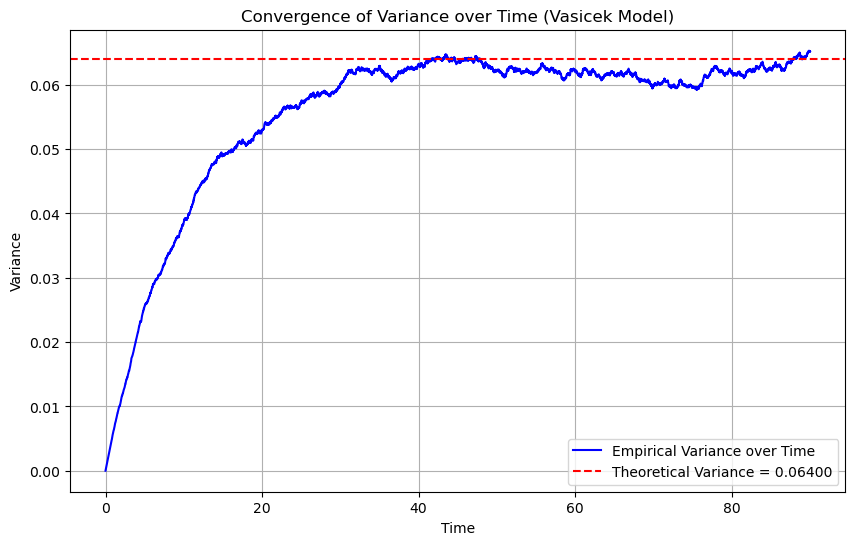

Theoretical Variance: 0.06400


In [13]:
# Plotting the results for variance over time
def plot_variance_convergence(r0, T, N, num_paths, param_set, t_max):
    t, r_paths = vasicek_simulation_multi(r0, param_set["b"], param_set["a"], param_set["sigma"], T, N, num_paths)
    
    # Calculate theoretical variance
    theoretical_variance = (param_set["sigma"] ** 2) / (2 * param_set["a"])
    
    # Calculate empirical variance over time
    empirical_variance_over_time = np.var(r_paths, axis=0)
    
    # Select time range up to t_max for a clearer presentation
    t_max_index = int(N * t_max / T)
    t_selected = t[:t_max_index]
    empirical_variance_selected = empirical_variance_over_time[:t_max_index]
    
    # Plot empirical variance over time
    plt.figure(figsize=(10, 6))
    plt.plot(t_selected, empirical_variance_selected, label='Empirical Variance over Time', color='blue')
    plt.axhline(y=theoretical_variance, color='red', linestyle='--', label=f'Theoretical Variance = {theoretical_variance:.5f}')
    plt.title('Convergence of Variance over Time (Vasicek Model)')
    plt.xlabel('Time')
    plt.ylabel('Variance')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    print(f"Theoretical Variance: {theoretical_variance:.5f}")
# Parameters for Vasicek model (base case)
params = {"b": 0.04, "a": 0.05, "sigma": 0.08}
t_max = 90  # Adjust t_max to control how much time is displayed

plot_variance_convergence(r0, T, N, num_paths, params, t_max)

## Try to vary some of the parameters listed above and see how their value affect the simulation results.

  Empirical mean at large t: 0.03846, Expected mean: 0.04
  Empirical variance at large t: 0.03234, Expected variance: 0.03200



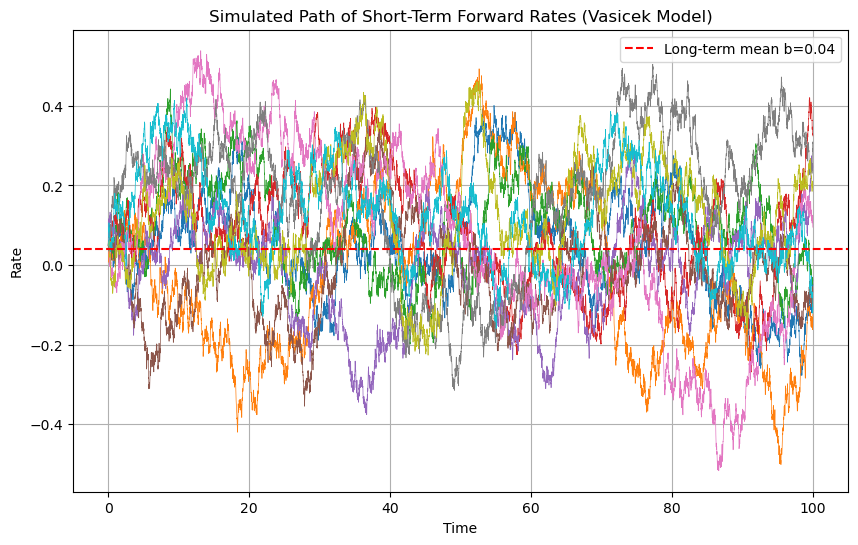

In [2]:
params= {"b":0.04,"a":0.1,"sigma":0.08}#faster mean-reversion
plot_vasicek_results(r0, T, N, num_paths, params)

  Empirical mean at large t: 0.04496, Expected mean: 0.04
  Empirical variance at large t: 0.07158, Expected variance: 0.07200



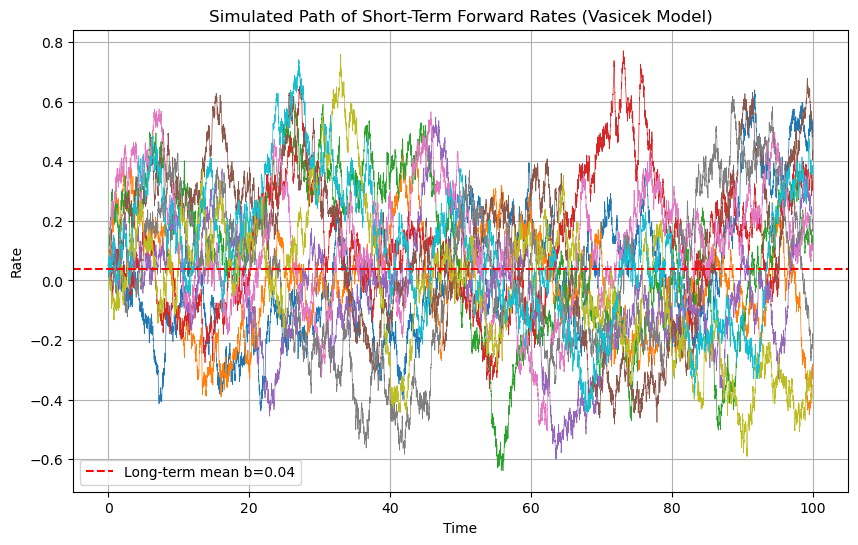

In [3]:
params={"b":0.04,"a":0.1,"sigma":0.12} #higher volitility 
plot_vasicek_results(r0, T, N, num_paths, params)

  Empirical mean at large t: 0.07648, Expected mean: 0.08
  Empirical variance at large t: 0.00519, Expected variance: 0.00533



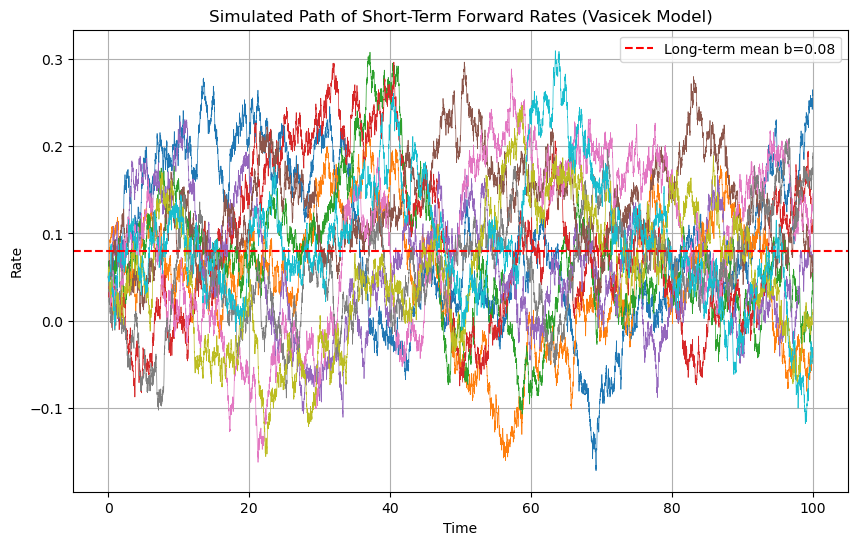

In [4]:
params={"b":0.08,"a":0.15,"sigma":0.04} #higher ong-term mean + mean reversion speed + lower volitility 
plot_vasicek_results(r0, T, N, num_paths, params)

  Empirical mean at large t: 0.08288, Expected mean: 0.08
  Empirical variance at large t: 0.04002, Expected variance: 0.04000



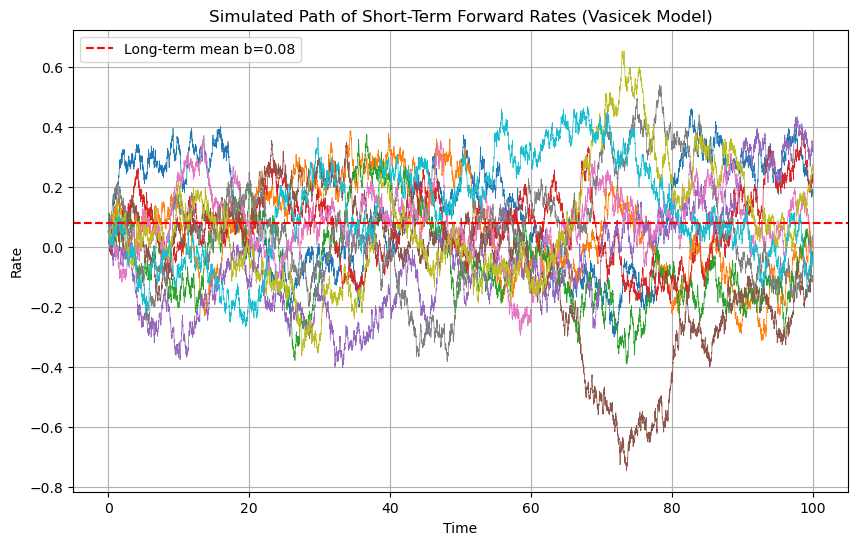

In [14]:
params={"b":0.08,"a":0.08,"sigma":0.08} #Higher Long-Term Mean and Higher Volatility
plot_vasicek_results(r0, T, N, num_paths, params)

### Varying some of the parameters
We successfully tested various parameter combinations in the Vasicek model. Let's summarize the results:

Key Learnings:
Mean Reversion Speed a: Increasing 
a results in faster reversion to the long-term mean, reducing the variance.
Volatility σ: Higher 
σ results in greater fluctuations around the mean, increasing variance.
Long-Term Mean b: Raising 
b shifts the oscillation center to a higher value.

### Confirm the Vasicek model simulation converges to the correct theoretical limits
Based on the results shown above, we found that the mean and variance both converge to the correct limits. 

## (b)CIR Model

Empirical mean at large t: 0.04044, Expected mean: 0.04
Empirical variance at large t: 0.00258, Expected variance: 0.00256
Skewness: 2.63221
Kurtosis: 11.46132


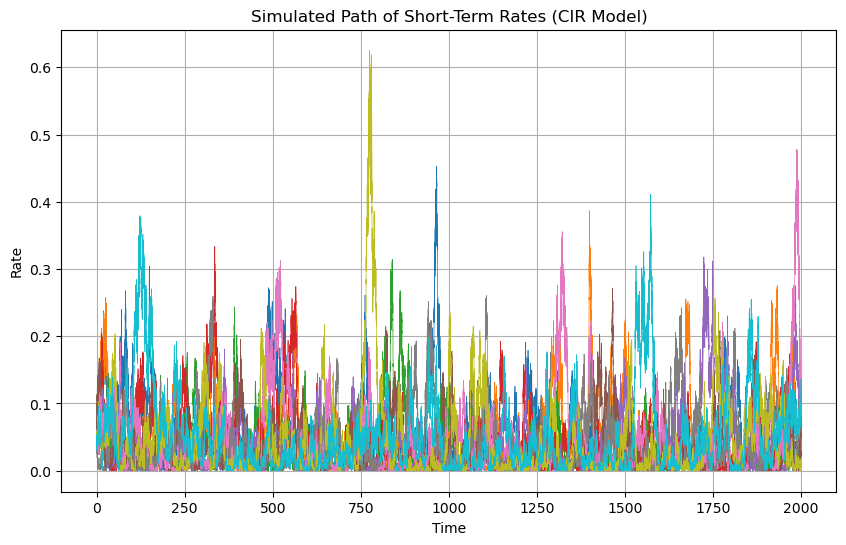

In [52]:
import numpy as np
import matplotlib.pyplot as plt

# CIR Model Simulation
def cir_simulation_multi(r0, b, a, sigma, T, N, num_paths):
    dt = T / N  
    t = np.linspace(0, T, N)  
    r_paths = np.zeros((num_paths, N))  
    r_paths[:, 0] = r0  
    
   
    for i in range(1, N):
        epsilon = np.random.normal(0, 1, num_paths) 
        r_paths[:, i] = r_paths[:, i - 1] + a * (b - r_paths[:, i - 1]) * dt + sigma * np.sqrt(r_paths[:, i - 1]) * np.sqrt(dt) * epsilon
        r_paths[:, i] = np.maximum(r_paths[:, i], 0)  

    return t, r_paths


r0 = 0.05  
T = 2000.0  
N = 200000 
num_paths = 3000  

params = {"b": 0.04, "a": 0.05, "sigma": 0.08}

t, r_paths = cir_simulation_multi(r0, params["b"], params["a"], params["sigma"], T, N, num_paths)

# expectation and variance 
r_at_large_t = r_paths[:, -1] 
empirical_mean = np.mean(r_at_large_t)
empirical_variance = np.var(r_at_large_t)

# Theoretical mean and variance 
theoretical_mean = params["b"]
theoretical_variance = (params["sigma"]**2) / (2 * params["a"])*params["b"]

print(f"Empirical mean at large t: {empirical_mean:.5f}, Expected mean: {theoretical_mean}")
print(f"Empirical variance at large t: {empirical_variance:.5f}, Expected variance: {theoretical_variance:.5f}")

from scipy.stats import kurtosis, skew

print(f"Skewness: {skew(r_at_large_t):.5f}")
print(f"Kurtosis: {kurtosis(r_at_large_t):.5f}")

plt.figure(figsize=(10, 6))
for j in range(min(10, num_paths)): 
    plt.plot(t, r_paths[j, :], lw=0.5)

plt.title('Simulated Path of Short-Term Rates (CIR Model)')
plt.xlabel('Time')
plt.ylabel('Rate')
plt.grid(True)
plt.show()


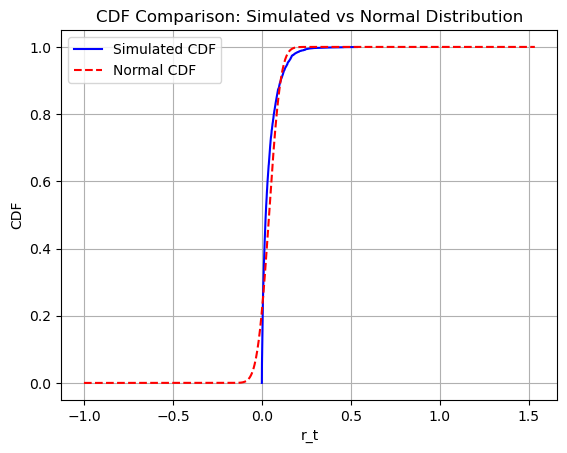

In [53]:
import matplotlib.pyplot as plt
from scipy.stats import norm

# simulated CDF
sorted_rt = np.sort(r_at_large_t)
cdf_simulated = np.arange(len(sorted_rt)) / float(len(sorted_rt))

# NORMAL CDF
x = np.linspace(min(sorted_rt) - 1, max(sorted_rt) + 1, 1000)  # Extend x range slightly
cdf_normal = norm.cdf(x, np.mean(sorted_rt), np.std(sorted_rt))

# Comparision Gragh
plt.plot(sorted_rt, cdf_simulated, label="Simulated CDF", color='blue')
plt.plot(x, cdf_normal, label="Normal CDF", color='red', linestyle='--')

plt.title("CDF Comparison: Simulated vs Normal Distribution")
plt.xlabel("r_t")
plt.ylabel("CDF")
plt.legend()
plt.grid(True)
plt.show()

We see that the simulated CDF (blue line) aligns closely with the normal CDF (red dashed line) but shows slight deviations, especially around the tails. This alignment suggests that, to a large extent, the simulated 𝑟𝑡 follows a distribution close to normal.
However, any small deviations in the tails might indicate the model's slight departure from a perfect normal distribution, which can be further assessed by looking at skewness and kurtosis values.

This visual approach is helpful for quickly assessing if the simulated distribution has properties similar to the normal distribution. If the CDFs matched perfectly, it would imply the distributions are identical.

In [ ]:
# # Plot histogram and normal PDF
# plt.figure(figsize=(10, 6))
# plt.hist(r_at_large_t, bins=30, density=True, alpha=0.6, color='skyblue', label="Empirical Distribution")

# # Fit and overlay normal distribution for comparison
# mu, std = empirical_mean, np.sqrt(empirical_variance)
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin, xmax, 1000)
# p = norm.pdf(x, mu, std)
# plt.plot(x, p, 'r--', linewidth=2, label="Normal PDF")

# # Add titles and labels
# plt.title("CIR Model: Empirical vs. Normal Distribution")
# plt.xlabel("Interest Rate")
# plt.ylabel("Density")
# plt.legend()
# plt.grid(True)
# plt.show()

### 
Skewness measures the asymmetry of the distribution. A normal distribution is symmetric around its mean, so it has a skewness of zero. For a normal distribution, the kurtosis is 3, which is also referred to as the "mesokurtic" level.

Based on the statistical outputs: 
A positive skewness value (like 2.63) indicates that the distribution of rates 𝑟𝑡 ​is skewed to the right, meaning there is a longer tail on the positive side. Kurtosis measures the "tailedness" of the distribution. A high kurtosis value (like 11.46) indicates that the distribution has heavy tails and is more peaked than a normal distribution. This suggests the distribution is not normal, as normal distributions have a kurtosis value of 3.

Conclusion:
the skewness and high kurtosis show that the distribution is not normal, which is a characteristic of the CIR model. The model produces a distribution with right skew and heavier tails than a normal distribution, which is typical for interest rate modeling, where rates cannot go below zero and tend to have occasional high spikes.
This output demonstrates that the CIR model provides an accurate mean and variance for interest rates while also capturing the non-normal characteristics of real-world interest rate distributions.

## Q2

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def cir_simulation_multi(r0, b, a, sigma, T, N, num_paths):
    dt=T/N
    t=np.linspace(0,T,N)
    r_paths=np.zeros((num_paths,N))
    r_paths[:,0]=r0
    
    for i in range(1,N):
        epsilon=np.random.normal(0,1,num_paths)
        r_paths[:,i]=r_paths[:,i-1]+a*(b-r_paths[:,i-1])*dt+sigma*np.sqrt(np.abs(r_paths[:,i-1]))*np.sqrt(dt)*epsilon
        r_paths[:,i]=np.maximum(r_paths[:,i],0)
    return t,r_paths

def zero_coupon_bond_price(r_paths,dt):
    discount_factor=np.exp(-np.sum(r_paths*dt,axis=1))
    return np.mean(discount_factor)          

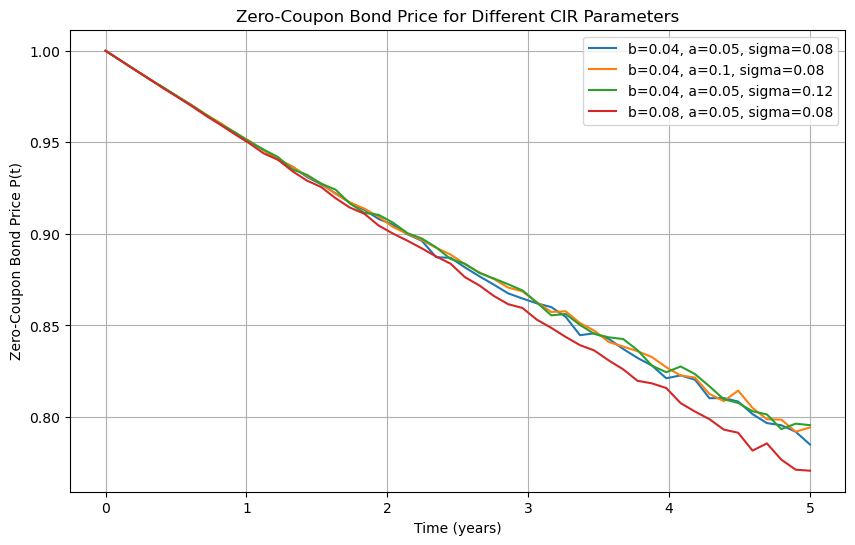

In [27]:
# Parameters for CIR model
r0 = 0.05  # Initial rate
N = 500  # Number of time steps
num_paths = 1000  # Number of simulated paths
tenors = np.linspace(0, 5, 50)  # Tenors from 0 to 5 years

# Different parameter sets for CIR
params = [
    {"b": 0.04, "a": 0.05, "sigma": 0.08},  # Base case
    {"b": 0.04, "a": 0.1, "sigma": 0.08},   # Higher mean reversion speed
    {"b": 0.04, "a": 0.05, "sigma": 0.12},  # Higher volatility
    {"b": 0.08, "a": 0.05, "sigma": 0.08},  # Higher long-term mean
]

# Plotting zero-coupon bond prices for different parameter sets
plt.figure(figsize=(10, 6))

for param_set in params:
    bond_prices = []
    for T in tenors:
        # Simulate CIR paths for the current tenor T
        t, r_paths = cir_simulation_multi(r0, param_set["b"], param_set["a"], param_set["sigma"], T, N, num_paths)
        
        # Calculate the bond price for this tenor
        dt = T / N  # Adjust time step size for the current tenor
        bond_price = zero_coupon_bond_price(r_paths, dt)
        bond_prices.append(bond_price)
    
    # Plot bond price as a function of tenor
    label = f'b={param_set["b"]}, a={param_set["a"]}, sigma={param_set["sigma"]}'
    plt.plot(tenors, bond_prices, label=label)

plt.title("Zero-Coupon Bond Price for Different CIR Parameters")
plt.xlabel("Time (years)")
plt.ylabel("Zero-Coupon Bond Price P(t)")
plt.legend()
plt.grid(True)
plt.show()

## b

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

# CIR simulation for bond price calculation
def cir_simulation_bond_price(a, b, sigma, r0, T, num_paths, N):
    dt = T / N
    r_paths = np.zeros((num_paths, N))
    r_paths[:, 0] = r0
    
    for i in range(1, N):
        epsilon = np.random.normal(0, 1, num_paths)
        r_paths[:, i] = r_paths[:, i - 1] + a * (b - r_paths[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(r_paths[:, i - 1], 0)) * np.sqrt(dt) * epsilon
    
    # Approximate zero-coupon bond price as the mean of discount factors
    discount_factors = np.exp(-np.sum(r_paths * dt, axis=1))
    return np.mean(discount_factors)*100

# Objective function to minimize
def objective_ab(params, r0, sigma_fixed, market_prices, tenors, num_paths, N):
    a, b = params
    error = 0.0
    for i, T in enumerate(tenors):
        P_sim = cir_simulation_bond_price(a, b, sigma_fixed, r0, T, num_paths, N)
        error += (P_sim - market_prices[i]) ** 2
    return error

# Market data
market_prices = [99.57, 98.73, 97.45, 95.62]  # Market prices for 1M, 3M, 6M, 1Y
tenors = [1/12, 3/12, 6/12, 1.0]              # Tenors in years
r0 = 0.052                                     # Initial short-term rate (annualized)
num_paths = 10000                              # Number of paths for simulation
N = 5000                                      # Number of time steps per path

# Step 1: Fix sigma and optimize a and b
sigma_fixed = 0.1  # Initial guess for sigma
initial_guess_ab = [0.1, 0.05]  # Initial guess for a and b

result_ab = minimize(objective_ab, initial_guess_ab, args=(r0, sigma_fixed, market_prices, tenors, num_paths, N), bounds=[(0, None), (0, None)],method="Powell")
a_opt, b_opt = result_ab.x

print("After Step 1:")
print(f"a = {a_opt}")
print(f"b = {b_opt}")
print(f"Fixed sigma = {sigma_fixed}")

/var/folders/3r/7cf0xpss5jb7pyzjvfv1ww000000gn/T/ipykernel_71207/2271796756.py:13: RuntimeWarning: overflow encountered in multiply
  r_paths[:, i] = r_paths[:, i - 1] + a * (b - r_paths[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(r_paths[:, i - 1], 0)) * np.sqrt(dt) * epsilon
/var/folders/3r/7cf0xpss5jb7pyzjvfv1ww000000gn/T/ipykernel_71207/2271796756.py:13: RuntimeWarning: invalid value encountered in add
  r_paths[:, i] = r_paths[:, i - 1] + a * (b - r_paths[:, i - 1]) * dt + sigma * np.sqrt(np.maximum(r_paths[:, i - 1], 0)) * np.sqrt(dt) * epsilon


After Step 1:
a = 7118.875060406462
b = 0.046503295844445486
Fixed sigma = 0.1


In [2]:
# Objective function for optimizing sigma, fixing a and b
def objective_sigma(sigma, a_fixed, b_fixed, r0, market_prices, tenors, num_paths, N):
    error = 0.0
    for i, T in enumerate(tenors):
        P_sim = cir_simulation_bond_price(a_fixed, b_fixed, sigma, r0, T, num_paths, N)
        error += (P_sim - market_prices[i]) ** 2
    return error

# Optimize sigma while fixing a and b
result_sigma = minimize(objective_sigma, [sigma_fixed], args=(a_opt, b_opt, r0, market_prices, tenors, num_paths, N), bounds=[(0, None)])
sigma_opt = result_sigma.x[0]

print("After Step 2:")
print(f"Optimized sigma = {sigma_opt}")
print(f"Fixed a = {a_opt}")
print(f"Fixed b = {b_opt}")

After Step 2:
Optimized sigma = 0.10000131893093056
Fixed a = 7118.875060406462
Fixed b = 0.046503295844445486


In [4]:
# Objective function for fine-tuning all parameters together
def objective_all(params, r0, market_prices, tenors, num_paths, N):
    a, b, sigma = params
    error = 0.0
    for i, T in enumerate(tenors):
        P_sim = cir_simulation_bond_price(a, b, sigma, r0, T, num_paths, N)
        error += (P_sim - market_prices[i]) ** 2
    return error

# Fine-tune all parameters starting from the optimized values
initial_guess_all = [a_opt, b_opt, sigma_opt]
bounds = [(0.01, 0.5), (0.01, 0.1), (0.01, 0.2)]  # Adjust bounds for a, b, sigma
result_all = minimize(objective_all, initial_guess_all, args=(r0, market_prices, tenors, num_paths, N), bounds=bounds,method="Powell")
a_final, b_final, sigma_final = result_all.x

print("Final optimized parameters:")
print(f"a = {a_final}")
print(f"b = {b_final}")
print(f"sigma = {sigma_final}")


/var/folders/3r/7cf0xpss5jb7pyzjvfv1ww000000gn/T/ipykernel_71207/2512451749.py:13: OptimizeWarning: Initial guess is not within the specified bounds
  result_all = minimize(objective_all, initial_guess_all, args=(r0, market_prices, tenors, num_paths, N), bounds=bounds,method="Powell")


Final optimized parameters:
a = 0.39206286910857036
b = 0.01297844741533215
sigma = 0.12801652566535698


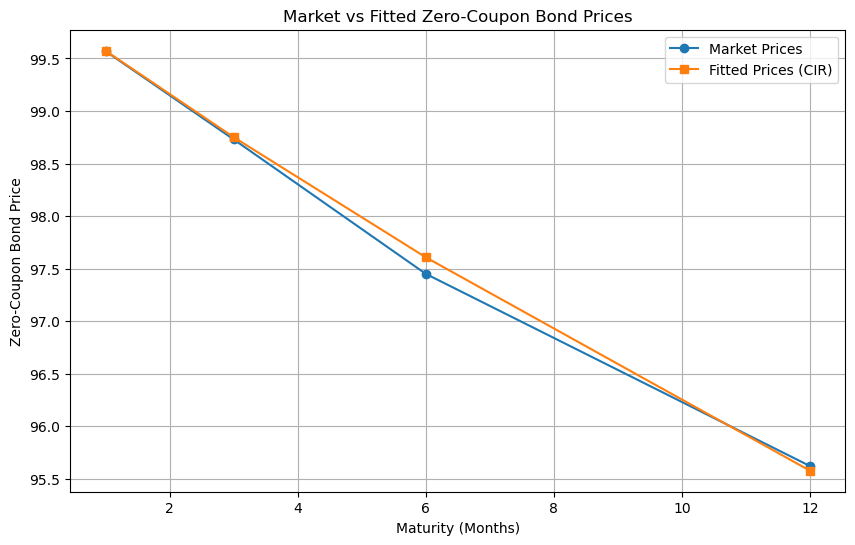

In [5]:
# Calculate fitted prices using final optimized parameters
fitted_prices = [cir_simulation_bond_price(a_final, b_final, sigma_final, r0, T, num_paths, N)for T in tenors]

# Plot market prices and fitted prices
plt.figure(figsize=(10, 6))
plt.plot([1, 3, 6, 12], market_prices, 'o-', label="Market Prices")
plt.plot([1, 3, 6, 12], fitted_prices, 's-', label="Fitted Prices (CIR)")
plt.xlabel("Maturity (Months)")
plt.ylabel("Zero-Coupon Bond Price")
plt.title("Market vs Fitted Zero-Coupon Bond Prices")
plt.legend()
plt.grid(True)
plt.show()


## Question 3

In [15]:
import numpy as np
from scipy.stats import norm
from scipy.optimize import minimize

In [27]:
def calculate_fair_swap_rate(a,b,sigma,r0,T):
    P_T=cir_simulation_bond_price(a, b, sigma, r0, T, num_paths, N)/100
    fair_swap_rate=(1-P_T)/T
    return fair_swap_rate

def black_scholes_swaption_price(P_T, K, sigma, T):
    d1=(np.log(P_T/K)+ 0.5*sigma**2*T)/(sigma*np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    swaption_price = P_T * norm.cdf(d1) - K * norm.cdf(d2)
    return swaption_price

a, b, sigma, r0 = 0.392, 0.01298, 0.128, 0.052
T_swaption = 1 / 12  # 1 month for swaption maturity
T_tenor = 3 / 12  # 3-month tenor for underlying swap
T_total = T_swaption + T_tenor

fair_swap_rate = calculate_fair_swap_rate(a, b, sigma, r0, T_tenor)
print(f"Fair Swap Rate (Strike Rate): {fair_swap_rate:.4f}")

P_T = cir_simulation_bond_price(a, b, sigma, r0, T_total, num_paths=10000, N=2000)/100 

swaption_price = black_scholes_swaption_price(P_T, fair_swap_rate, sigma, T_swaption)
print(f"ATM Swaption Price: {swaption_price:.4f}")

Fair Swap Rate (Strike Rate): 0.0498
ATM Swaption Price: 0.9338


In [29]:
# Implied Volatility
def implied_volatility_objective(sigma, put_option_price, P_T, K, T):
    d1 = (np.log(P_T / K) + (0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    calculated_price = K * np.exp(-T) * norm.cdf(-d2) - P_T * norm.cdf(-d1)
    return (calculated_price - put_option_price) ** 2
    
payer_swaption_price = 0.9338
T=T_swaption

result = minimize(implied_volatility_objective, 0.1, args=(payer_swaption_price, P_T, fair_swap_rate, T_swaption), bounds=[(0.01, 1.0)])
implied_volatility = result.x[0] if result.success else None
print(f"implied volatility: {implied_volatility:.4f}")

implied volatility: 0.1000
